<a href="https://colab.research.google.com/github/sakaifee/Titanic_Exploratory_Data_Analysis/blob/main/EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_titanic_dataset = pd.read_csv("/content/tested.csv")
df_titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_titanic_dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

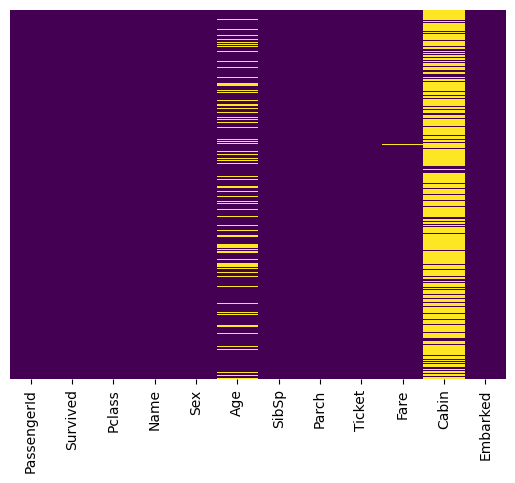

In [5]:
sns.heatmap(df_titanic_dataset.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<Axes: xlabel='Survived', ylabel='count'>

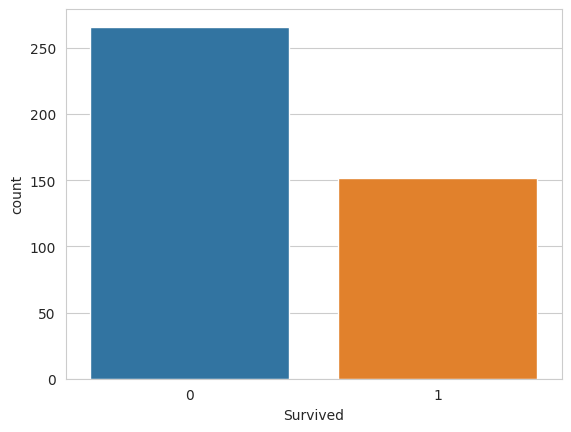

In [6]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=df_titanic_dataset)

<Axes: xlabel='Survived', ylabel='count'>

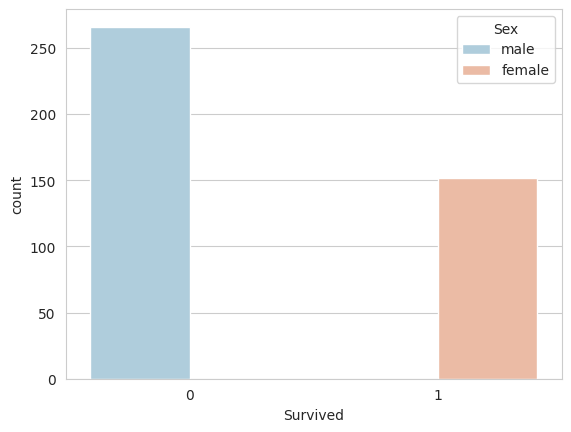

In [7]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex", data=df_titanic_dataset, palette="RdBu_r")

In [8]:
df_titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

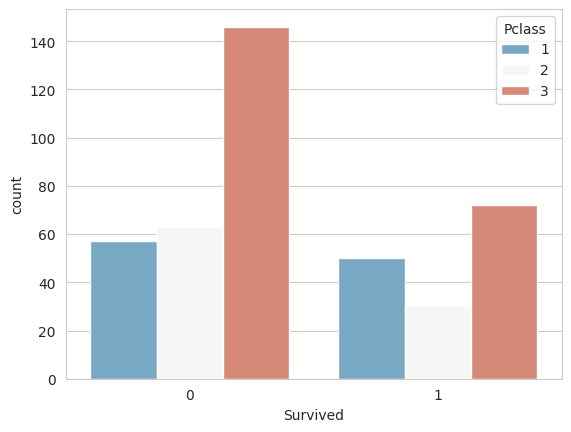

In [9]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass", data=df_titanic_dataset, palette="RdBu_r")

<ipython-input-10-310bd52e2180>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titanic_dataset['Age'].dropna(),kde=False, color="darkred", bins=40)


<Axes: xlabel='Age'>

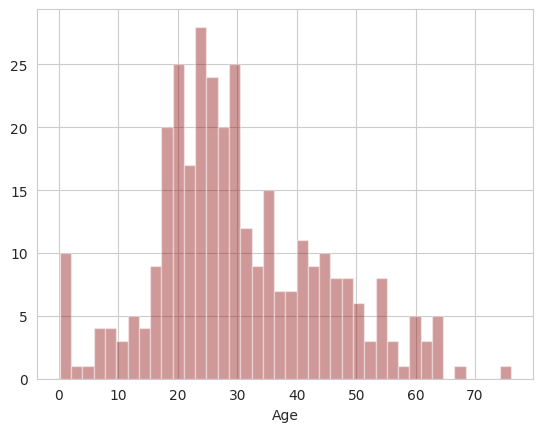

In [10]:
sns.distplot(df_titanic_dataset['Age'].dropna(),kde=False, color="darkred", bins=40)

<Axes: >

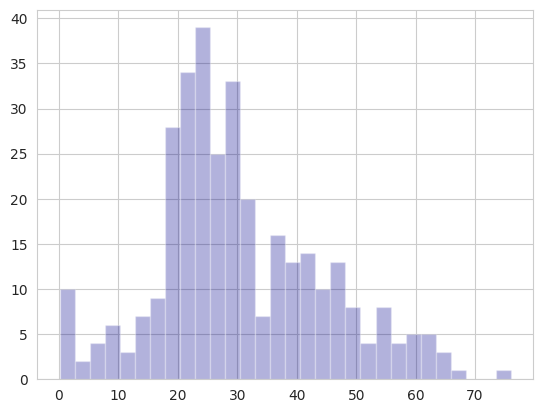

In [11]:
df_titanic_dataset['Age'].hist(bins=30,color='darkblue',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

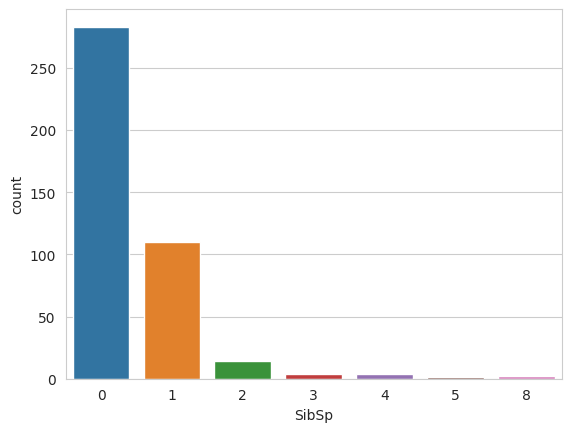

In [12]:
sns.countplot(x="SibSp", data=df_titanic_dataset)

<Axes: >

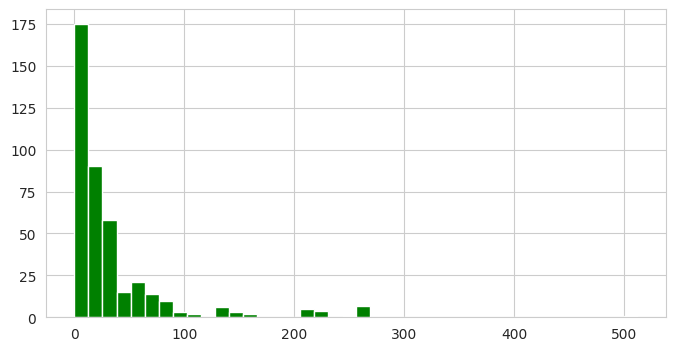

In [13]:
df_titanic_dataset["Fare"].hist(color='green',bins=40,figsize=(8,4))

## Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

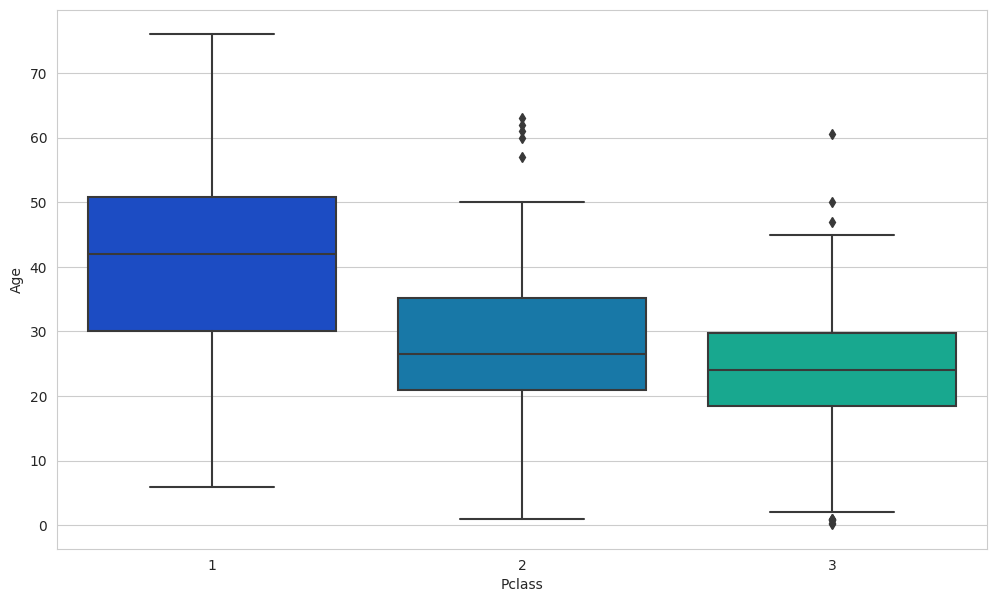

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df_titanic_dataset,palette='winter')

In [15]:
def imput_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age


In [16]:
df_titanic_dataset['Age'] = df_titanic_dataset[['Age','Pclass']].apply(imput_age,axis=1)

<Axes: >

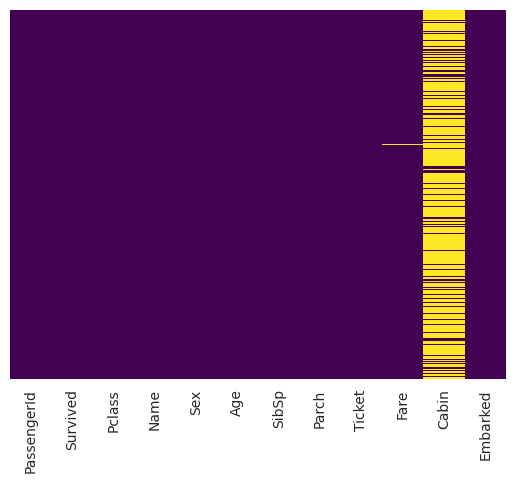

In [17]:
sns.heatmap(df_titanic_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
df_titanic_dataset.drop('Cabin',axis=1,inplace=True)

In [19]:
df_titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


### Converting Categorical Features

In [20]:
df_titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [21]:
pd.get_dummies(df_titanic_dataset["Embarked"],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [22]:
sex = pd.get_dummies(df_titanic_dataset["Sex"],drop_first=True)
embark = pd.get_dummies(df_titanic_dataset["Embarked"],drop_first=True)

In [23]:
df_titanic_dataset.drop(["Sex","Name","Ticket"],axis=1,inplace=True)

In [24]:
df_titanic_dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,34.5,0,0,7.8292,Q
1,893,1,3,47.0,1,0,7.0000,S
2,894,0,2,62.0,0,0,9.6875,Q
3,895,0,3,27.0,0,0,8.6625,S
4,896,1,3,22.0,1,1,12.2875,S


In [25]:
df_titanic_dataset = pd.concat([df_titanic_dataset,sex,embark],axis=1)

In [26]:
df_titanic_dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,892,0,3,34.5,0,0,7.8292,Q,1,1,0
1,893,1,3,47.0,1,0,7.0000,S,0,0,1
2,894,0,2,62.0,0,0,9.6875,Q,1,1,0
3,895,0,3,27.0,0,0,8.6625,S,1,0,1
4,896,1,3,22.0,1,1,12.2875,S,0,0,1
